In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

## load data from a sklearn dataset

In [8]:
import sklearn.datasets as data

d = data.load_boston()
X = d["data"]
y = d["target"]

X = scale(X)

In [9]:
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
arr = np.linspace(1,10,200)

mse = []
for p in arr:
    model = KNeighborsRegressor(n_neighbors=5, weights='distance', p=p)
    tmp = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    mse.append(np.mean(tmp))

In [35]:
out = np.round(arr[np.argmax(mse)], 1)
level = np.max(mse)

## plot the output

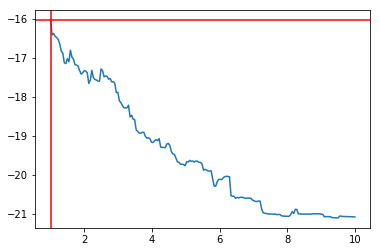

In [36]:
plt.plot(arr, mse)

plt.axvline(out, c="red")
plt.axhline(level, c="red")

In [37]:
w = open("./week2/answer_boston.dat", "w")
w.write(f"{out}")
w.close()